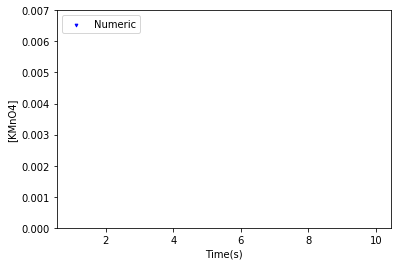

In [3]:
import matplotlib.pyplot as plt
import pandas as pd 
  
# reading csv file  
pd.read_csv("filename.csv")